<a href="https://colab.research.google.com/github/JacobGeorge761/TensorFlowGoogleColab/blob/main/MedicalCostRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [5]:
#read in the insurance dataset
insurance = pd.read_csv("/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# one hot encode our insurance dataframe
insurance_one_hot = pd.get_dummies(data = insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [7]:
# create our features and labels
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]


In [8]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [9]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [10]:
#create our training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#build our model
tf.random.set_seed(69)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
insurance_model.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9986.5078 - mae: 9986.5078  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7762.1128 - mae: 7762.1128    
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7745.2856 - mae: 7745.2856
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7290.2959 - mae: 7290.2959
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7527.8960 - mae: 7527.8960
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7529.1035 - mae: 7529.1035
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7256.6533 - mae: 7256.6533
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7545.6323 - mae: 7545.6323 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7251.1528 - mae: 7251.1528 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7216.7749 - mae: 7216.7749 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7304.7627 - mae: 7304.7627
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [12]:
# check results of the model on test data
insurance_model.evaluate(X_test, y_test)
#seems our model is performing slightly better on the testing data than the training


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6155.2754 - mae: 6155.2754  


[5957.25244140625, 5957.25244140625]

In [13]:
y_train.mean(), y_train.median()
# on average our model is quite a bit off

(np.float64(13346.089736364485), 9575.4421)

Our model is not performing well. Lets try to improve it

To try and improve the model we will run two experiments:
1. Add an extra layer with more hidden units (neurons) and use Adam optimizer
2. Same as above and train for longer
3. Try a different optimizer and a combination of 1 and 2

In [14]:
#build our model
tf.random.set_seed(69)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(), # if use SGD we get nan mae
              metrics=["mae"])

#fit the model
insurance_model_2.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13147.2266 - mae: 13147.2266
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13014.9512 - mae: 13014.9512
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12748.0107 - mae: 12748.0107
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12199.3379 - mae: 12199.3379
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11208.9531 - mae: 11208.9531
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9811.8467 - mae: 9811.8467
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8366.5645 - mae: 8366.5645
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7482.4072 - mae: 7482.4072
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7283.9976 - mae: 7283.9976
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7260.9092 - mae: 7260.9092
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7240.6011 - mae: 7240.6011
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [15]:
# check results of the model on test data
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4832.2754 - mae: 4832.2754  


[4704.7744140625, 4704.7744140625]

In [16]:
#build our model
tf.random.set_seed(69)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
insurance_model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(), # if use SGD we get nan mae
              metrics=["mae"])

#fit the model
history = insurance_model_3.fit(X_train,y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13124.6748 - mae: 13124.6748
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12963.8447 - mae: 12963.8447
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12638.5889 - mae: 12638.5889
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11991.2607 - mae: 11991.2607
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10879.7119 - mae: 10879.7119
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9428.5098 - mae: 9428.5098
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8051.3921 - mae: 8051.3921
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7363.8232 - mae: 7363.8232
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7244.7529 - mae: 7244.7529
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7224.7358 - mae: 7224.7358
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7204.3818 - mae: 7204.3818
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [17]:
# check results of the model on test data
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3545.5938 - mae: 3545.5938  


[3480.019287109375, 3480.019287109375]

In [18]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6155.2754 - mae: 6155.2754 


[5957.25244140625, 5957.25244140625]

Text(0.5, 0, 'epochs')

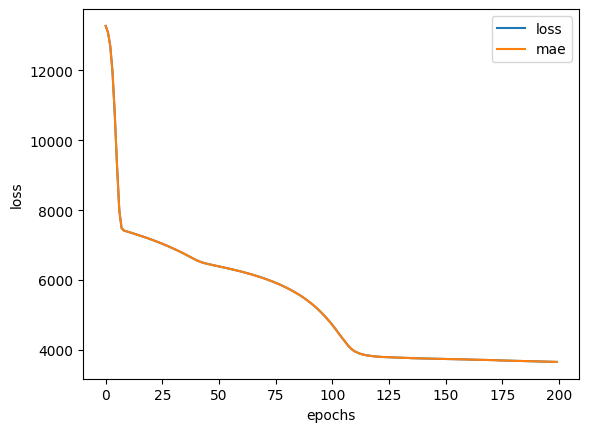

In [19]:
# plot history (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## How long should we train for?

It depends on the problem we are working on.

Tensorflow has a solution. Its called EarlyStopping Callback which is a tensorflow component you can add to your model to stop training once it stops improving a certain metric

## Preprocessing data (Normalization and Standardization)

In terms of scaling values, neural networls tend to prefer normalization.

If your not sure which to use, just try both and see which performs better.

In [20]:
#re-initialize the insurance dataset
insurance = pd.read_csv("/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


#create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all these values between 0 aand 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])

)

#create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fit the column transformer to our training data
ct.fit(X_train)

#transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [24]:
# What does our data look like now?
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [25]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [26]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded. Now lets build a neural network model on it and see the results

In [27]:
#build our model
tf.random.set_seed(69)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
insurance_model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(), # if use SGD we get nan mae
              metrics=["mae"])

#fit the model
insurance_model_4.fit(X_train_normal,y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 13165.8047 - mae: 13165.8047
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13159.9854 - mae: 13159.9854
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13145.5635 - mae: 13145.5635
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13112.5322 - mae: 13112.5322
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13049.2373 - mae: 13049.2373
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12944.0635 - mae: 12944.0635
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12786.1602 - mae: 12786.1602
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12565.2207 - mae: 12565.2207
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12271.3320 - mae: 12271.3320
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11895.8682 - mae: 11895.8682
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11444.1592 - mae: 11444.1592
Epoch 12/200
34/34 ━━━━━━━━━━━

In [28]:
#evaluate how our model did on the normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3218.8379 - mae: 3218.8379  


[3165.91650390625, 3165.91650390625]

In [ ]:
#Insurance model 3 results
#9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3545.5938 - mae: 3545.5938
#[3480.019287109375, 3480.019287109375]

# we can see the normalized data makes the model better